### EDA for ELO Merchants


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import pandas_profiling
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', None)

In [5]:
#loading csv
merchants = pd.read_csv('/Users/rajmati.marlecha/Documents/elo-merchant-category-recommendation/merchants.csv')
merchants.head() 

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2 category_1 most_recent_sales_range  \
0    -0.057471    -0.057471          N                       E   
1    -0.057471    -0.057471          N                       E   
2    -0.057471    -0.057471          N                       E   
3    -0.057471    -0.057471          Y                       E   
4    -0.057471    -0.057471          Y                       E   

  most_recent_purchases_range  avg_sales_lag3  avg_purchases_lag3  \
0                           E       -0.400000            9.666667   
1                           E       -0.720000            1.750000   
2                           E      -82.130000          260.000000   
3                           E             nan            1.666667   
4                           E             nan            0.500000   

   active_months_lag3  avg_sales_lag6  avg_purchases_lag6  active_months_lag6  \
0                   3       -2.250000           18.666667                   6   
1                   3       -0.740000            1.291667                   6   
2                   2      -82.130000          260.000000                   2   
3                   3             nan            4.666667                   6   
4                   3             nan            0.361111                   6   

   avg_sales_lag12  avg_purchases_lag12  active_months_lag12 category_4  \
0        -2.320000            13.916667                   12          N   
1        -0.570000             1.687500                   12          N   
2       -82.130000           260.000000                    2          N   
3              nan             3.833333                   12          Y   
4              nan             0.347222                   12          Y   

   city_id  state_id  category_2  
0      242         9    1.000000  
1       22        16    1.000000  
2       -1         5    5.000000  
3       -1        -1         nan  
4       -1        -1         nan

In [9]:
pandas_profiling.ProfileReport(merchants)


* Since categorical variables are ignored from correlation , we will impute them and again check the profiling statistics
* As per the dictionery we know A>B>C>D>E. , hence imputing corresponding weighted numbers



In [6]:
def convertToNumbers(df):
    for col in ['category_1', 'category_4']:
        df[col] = df[col].map({'Y':1, 'N':0})
        
    for col in ['most_recent_purchases_range', 'most_recent_sales_range']:
        df[col] = df[col].map({'A':5, 'B':4,'C':3, 'D':2,'E':1})    
    return df

merchants = convertToNumbers(merchants)


In [12]:
pandas_profiling.ProfileReport(merchants)

In [13]:
merchants.corr()

merchant_group_id  merchant_category_id  \
merchant_group_id                     1.000000             -0.015599   
merchant_category_id                 -0.015599              1.000000   
subsector_id                          0.087288             -0.004112   
numerical_1                          -0.057871             -0.002459   
numerical_2                          -0.057829             -0.002711   
category_1                            0.032158             -0.003885   
most_recent_sales_range               0.148538              0.044955   
most_recent_purchases_range           0.113797              0.077078   
avg_sales_lag3                       -0.002750              0.000554   
avg_purchases_lag3                   -0.002336             -0.000344   
active_months_lag3                    0.000400             -0.005517   
avg_sales_lag6                       -0.001727              0.001036   
avg_purchases_lag6                   -0.002943              0.000190   
active_months_lag6                   -0.004524             -0.009388   
avg_sales_lag12                      -0.001189              0.000800   
avg_purchases_lag12                  -0.003484              0.000729   
active_months_lag12                  -0.003478             -0.018072   
category_4                            0.123028             -0.017626   
city_id                              -0.091952             -0.004951   
state_id                             -0.032902              0.009357   
category_2                           -0.000157              0.020914   

                             subsector_id  numerical_1  numerical_2  \
merchant_group_id                0.087288    -0.057871    -0.057829   
merchant_category_id            -0.004112    -0.002459    -0.002711   
subsector_id                     1.000000     0.004493     0.005594   
numerical_1                      0.004493     1.000000     0.998749   
numerical_2                      0.005594     0.998749     1.000000   
category_1                      -0.050067    -0.002815    -0.002630   
most_recent_sales_range         -0.031244     0.166899     0.164273   
most_recent_purchases_range      0.157683     0.161665     0.159726   
avg_sales_lag3                  -0.000941    -0.000334    -0.000326   
avg_purchases_lag3               0.000038    -0.000289    -0.000281   
active_months_lag3               0.007864     0.003837     0.003760   
avg_sales_lag6                  -0.001508    -0.000326    -0.000318   
avg_purchases_lag6               0.000758    -0.000476    -0.000466   
active_months_lag6              -0.002241     0.008177     0.008038   
avg_sales_lag12                 -0.001766    -0.000288    -0.000281   
avg_purchases_lag12              0.001464    -0.000642    -0.000630   
active_months_lag12             -0.015790     0.016001     0.015758   
category_4                       0.048713     0.008670     0.007627   
city_id                         -0.015259    -0.009856    -0.009436   
state_id                         0.015125    -0.000882    -0.001072   
category_2                      -0.019570    -0.005443    -0.005634   

                             category_1  most_recent_sales_range  \
merchant_group_id              0.032158                 0.148538   
merchant_category_id          -0.003885                 0.044955   
subsector_id                  -0.050067                -0.031244   
numerical_1                   -0.002815                 0.166899   
numerical_2                   -0.002630                 0.164273   
category_1                     1.000000                 0.057434   
most_recent_sales_range        0.057434                 1.000000   
most_recent_purchases_range   -0.031530                 0.724153   
avg_sales_lag3                -0.000413                -0.004354   
avg_purchases_lag3             0.000124                -0.004301   
active_months_lag3            -0.012576                 0.024294   
avg_sales_lag6                -0.000417                -0.004250 

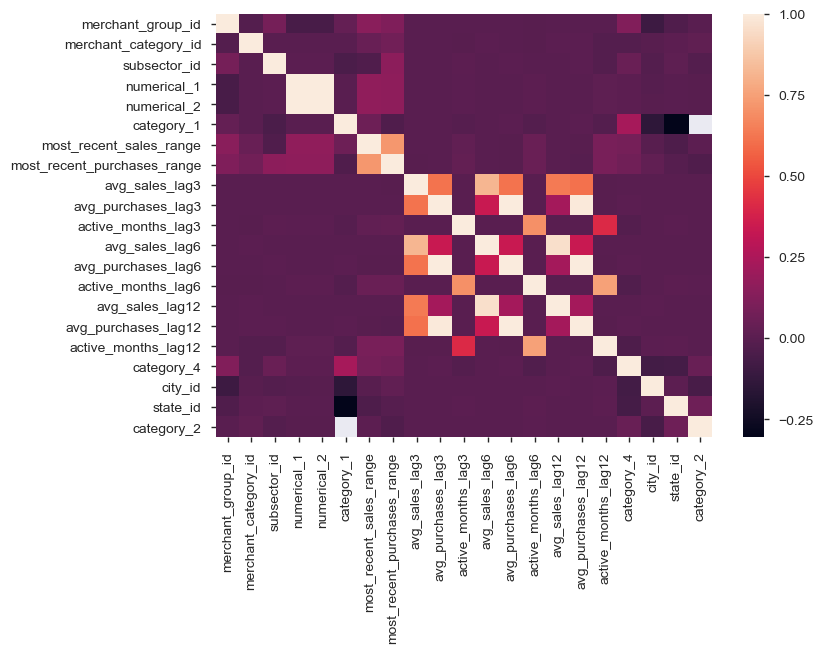

In [14]:
sns.heatmap(merchants.corr())

## Looking at the profiling report and the correlation matrix here is what our next steps are : 


### There are missing values as NaNs , we try to impute them as below:

* 'avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12' , we observe that the median values are much suitable than the mean value, hence we use mean to impute the missing value.
* for category_2 we see that most of the observations fall in the category value 1 , hence we use that as our imputed value such that the distribution is not hampered.
    
### Few columns have infinity as values , we try to replace the infinty values with first NaN and then impute them with correspoding median values :

* avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12 had infinity values which we replace by median.
* overall we use median instead of mean values is because we find that the distribution for those fields are skewed and hence median is a better representation of what is missing.

### We remove the highly correlated columns :

* avg_purchases_lag12 is highly correlated with avg_purchases_lag6 (ρ = 0.99755) 
* avg_purchases_lag6 is highly correlated with avg_purchases_lag3 (ρ = 0.99667) 
* avg_sales_lag12 is highly correlated with avg_sales_lag6 (ρ = 0.95842) 
* numerical_2 is highly correlated with numerical_1 (ρ = 0.99875) 
* hence we remove avg_purchases_lag6,avg_sales_lag12 and numerical_1

In [39]:
features = [c for c in merchants.columns if c not in ['merchant_id']]

In [7]:
merchants.columns[merchants.isna().any()].tolist()

['avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12', 'category_2']

In [8]:
merchants.fillna({x:1.0 for x in ['category_2']}, inplace=True)

In [9]:
merchants.head()

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2  category_1  most_recent_sales_range  \
0    -0.057471    -0.057471           0                        1   
1    -0.057471    -0.057471           0                        1   
2    -0.057471    -0.057471           0                        1   
3    -0.057471    -0.057471           1                        1   
4    -0.057471    -0.057471           1                        1   

   most_recent_purchases_range  avg_sales_lag3  avg_purchases_lag3  \
0                            1       -0.400000            9.666667   
1                            1       -0.720000            1.750000   
2                            1      -82.130000          260.000000   
3                            1             nan            1.666667   
4                            1             nan            0.500000   

   active_months_lag3  avg_sales_lag6  avg_purchases_lag6  active_months_lag6  \
0                   3       -2.250000           18.666667                   6   
1                   3       -0.740000            1.291667                   6   
2                   2      -82.130000          260.000000                   2   
3                   3             nan            4.666667                   6   
4                   3             nan            0.361111                   6   

   avg_sales_lag12  avg_purchases_lag12  active_months_lag12  category_4  \
0        -2.320000            13.916667                   12           0   
1        -0.570000             1.687500                   12           0   
2       -82.130000           260.000000                    2           0   
3              nan             3.833333                   12           1   
4              nan             0.347222                   12           1   

   city_id  state_id  category_2  
0      242         9    1.000000  
1       22        16    1.000000  
2       -1         5    5.000000  
3       -1        -1    1.000000  
4       -1        -1    1.000000

In [10]:
#merchants.fillna({x:1.0 for x in ['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']}, inplace=True)
#merchants.apply(lambda x: x.fillna(x.median()),axis=0)
merchants['avg_sales_lag3'].fillna((merchants['avg_sales_lag3'].median()), inplace=True)
merchants['avg_sales_lag6'].fillna((merchants['avg_sales_lag6'].median()), inplace=True)
merchants['avg_sales_lag12'].fillna((merchants['avg_sales_lag12'].median()), inplace=True)

In [11]:
print(merchants['avg_purchases_lag3'].min())
print(merchants['avg_purchases_lag3'].max())
print(merchants['avg_purchases_lag6'].min())
print(merchants['avg_purchases_lag6'].max())
print(merchants['avg_purchases_lag12'].min())
print(merchants['avg_purchases_lag12'].max())

0.33349533
inf
0.16704466
inf
0.09832954
inf


In [12]:
merchants[merchants==np.inf]=np.nan

In [13]:
merchants.columns[merchants.isna().any()].tolist()

['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']

In [14]:
print(merchants['avg_purchases_lag3'].mean())
print(merchants['avg_purchases_lag3'].median())
print(merchants['avg_purchases_lag6'].mean())
print(merchants['avg_purchases_lag6'].median())
print(merchants['avg_purchases_lag12'].mean())
print(merchants['avg_purchases_lag12'].median())

1.5907620965243745
1.01666667
1.8875678157761644
1.02696078
2.0791954108498123
1.04336043


In [15]:
merchants['avg_purchases_lag3'].fillna((merchants['avg_purchases_lag3'].median()), inplace=True)
merchants['avg_purchases_lag6'].fillna((merchants['avg_purchases_lag6'].median()), inplace=True)
merchants['avg_purchases_lag12'].fillna((merchants['avg_purchases_lag12'].median()), inplace=True)

### Test if all values imputed

In [16]:
merchants.columns[merchants.isna().any()].tolist()

[]

In [17]:
features = [c for c in merchants.columns if c not in ['merchant_id']]

In [18]:
len(features)

21

In [21]:
merchants.corr()

merchant_group_id  merchant_category_id  subsector_id  \
merchant_group_id              1.000000             -0.015599      0.087288   
merchant_category_id          -0.015599              1.000000     -0.004112   
subsector_id                   0.087288             -0.004112      1.000000   
numerical_1                   -0.057871             -0.002459      0.004493   
numerical_2                   -0.057829             -0.002711      0.005594   
avg_sales_lag3                -0.002750              0.000554     -0.000941   
avg_purchases_lag3            -0.002336             -0.000344      0.000038   
active_months_lag3             0.000400             -0.005517      0.007864   
avg_sales_lag6                -0.001727              0.001036     -0.001508   
avg_purchases_lag6            -0.002943              0.000190      0.000758   
active_months_lag6            -0.004524             -0.009388     -0.002241   
avg_sales_lag12               -0.001189              0.000800     -0.001766   
avg_purchases_lag12           -0.003484              0.000729      0.001464   
active_months_lag12           -0.003478             -0.018072     -0.015790   
city_id                       -0.091952             -0.004951     -0.015259   
state_id                      -0.032902              0.009357      0.015125   
category_2                    -0.004882              0.020709     -0.011956   

                      numerical_1  numerical_2  avg_sales_lag3  \
merchant_group_id       -0.057871    -0.057829       -0.002750   
merchant_category_id    -0.002459    -0.002711        0.000554   
subsector_id             0.004493     0.005594       -0.000941   
numerical_1              1.000000     0.998749       -0.000334   
numerical_2              0.998749     1.000000       -0.000326   
avg_sales_lag3          -0.000334    -0.000326        1.000000   
avg_purchases_lag3      -0.000289    -0.000281        0.616486   
active_months_lag3       0.003837     0.003760        0.000296   
avg_sales_lag6          -0.000326    -0.000318        0.818022   
avg_purchases_lag6      -0.000476    -0.000466        0.614135   
active_months_lag6       0.008177     0.008038       -0.001522   
avg_sales_lag12         -0.000288    -0.000281        0.634283   
avg_purchases_lag12     -0.000642    -0.000630        0.608928   
active_months_lag12      0.016001     0.015758       -0.005168   
city_id                 -0.009856    -0.009436       -0.001290   
state_id                -0.000882    -0.001072       -0.000140   
category_2              -0.004888    -0.005089       -0.002188   

                      avg_purchases_lag3  active_months_lag3  avg_sales_lag6  \
merchant_group_id              -0.002336            0.000400       -0.001727   
merchant_category_id           -0.000344           -0.005517        0.001036   
subsector_id                    0.000038            0.007864       -0.001508   
numerical_1                    -0.000289            0.003837       -0.000326   
numerical_2                    -0.000281            0.003760       -0.000318   
avg_sales_lag3                  0.616486            0.000296        0.818022   
avg_purchases_lag3              1.000000           -0.000197        0.339418   
active_months_lag3             -0.000197            1.000000        0.000302   
avg_sales_lag6                  0.339418            0.000302        1.000000   
avg_purchases_lag6              0.996669           -0.000029        0.339181   
active_months_lag6             -0.001472            0.703748       -0.000896   
avg_sales_lag12                 0.228468            0.000269        0.958423   
avg_purchases_lag12             0.989830            0.000102        0.336797   
active_months_lag12            -0.006785            0.412831       -0.003347   
city_id                        -0.000745           -0.000451        0.000466   
state_id                       -0.001008            0.004224       -0.000424   
category_2                     -0.001422          

## Dropping columns with high correlation :

In [19]:
merchants.drop(['avg_purchases_lag6','avg_sales_lag12','numerical_1'], axis=1,inplace=True)
merchants.head()

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_2  category_1  most_recent_sales_range  \
0    -0.057471           0                        1   
1    -0.057471           0                        1   
2    -0.057471           0                        1   
3    -0.057471           1                        1   
4    -0.057471           1                        1   

   most_recent_purchases_range  avg_sales_lag3  avg_purchases_lag3  \
0                            1       -0.400000            9.666667   
1                            1       -0.720000            1.750000   
2                            1      -82.130000          260.000000   
3                            1        1.000000            1.666667   
4                            1        1.000000            0.500000   

   active_months_lag3  avg_sales_lag6  active_months_lag6  \
0                   3       -2.250000                   6   
1                   3       -0.740000                   6   
2                   2      -82.130000                   2   
3                   3        1.010000                   6   
4                   3        1.010000                   6   

   avg_purchases_lag12  active_months_lag12  category_4  city_id  state_id  \
0            13.916667                   12           0      242         9   
1             1.687500                   12           0       22        16   
2           260.000000                    2           0       -1         5   
3             3.833333                   12           1       -1        -1   
4             0.347222                   12           1       -1        -1   

   category_2  
0    1.000000  
1    1.000000  
2    5.000000  
3    1.000000  
4    1.000000

### Looking at the distribution of the remaining variables . Checking their distribution as well as their correlation with other variables visually using pairplots
*

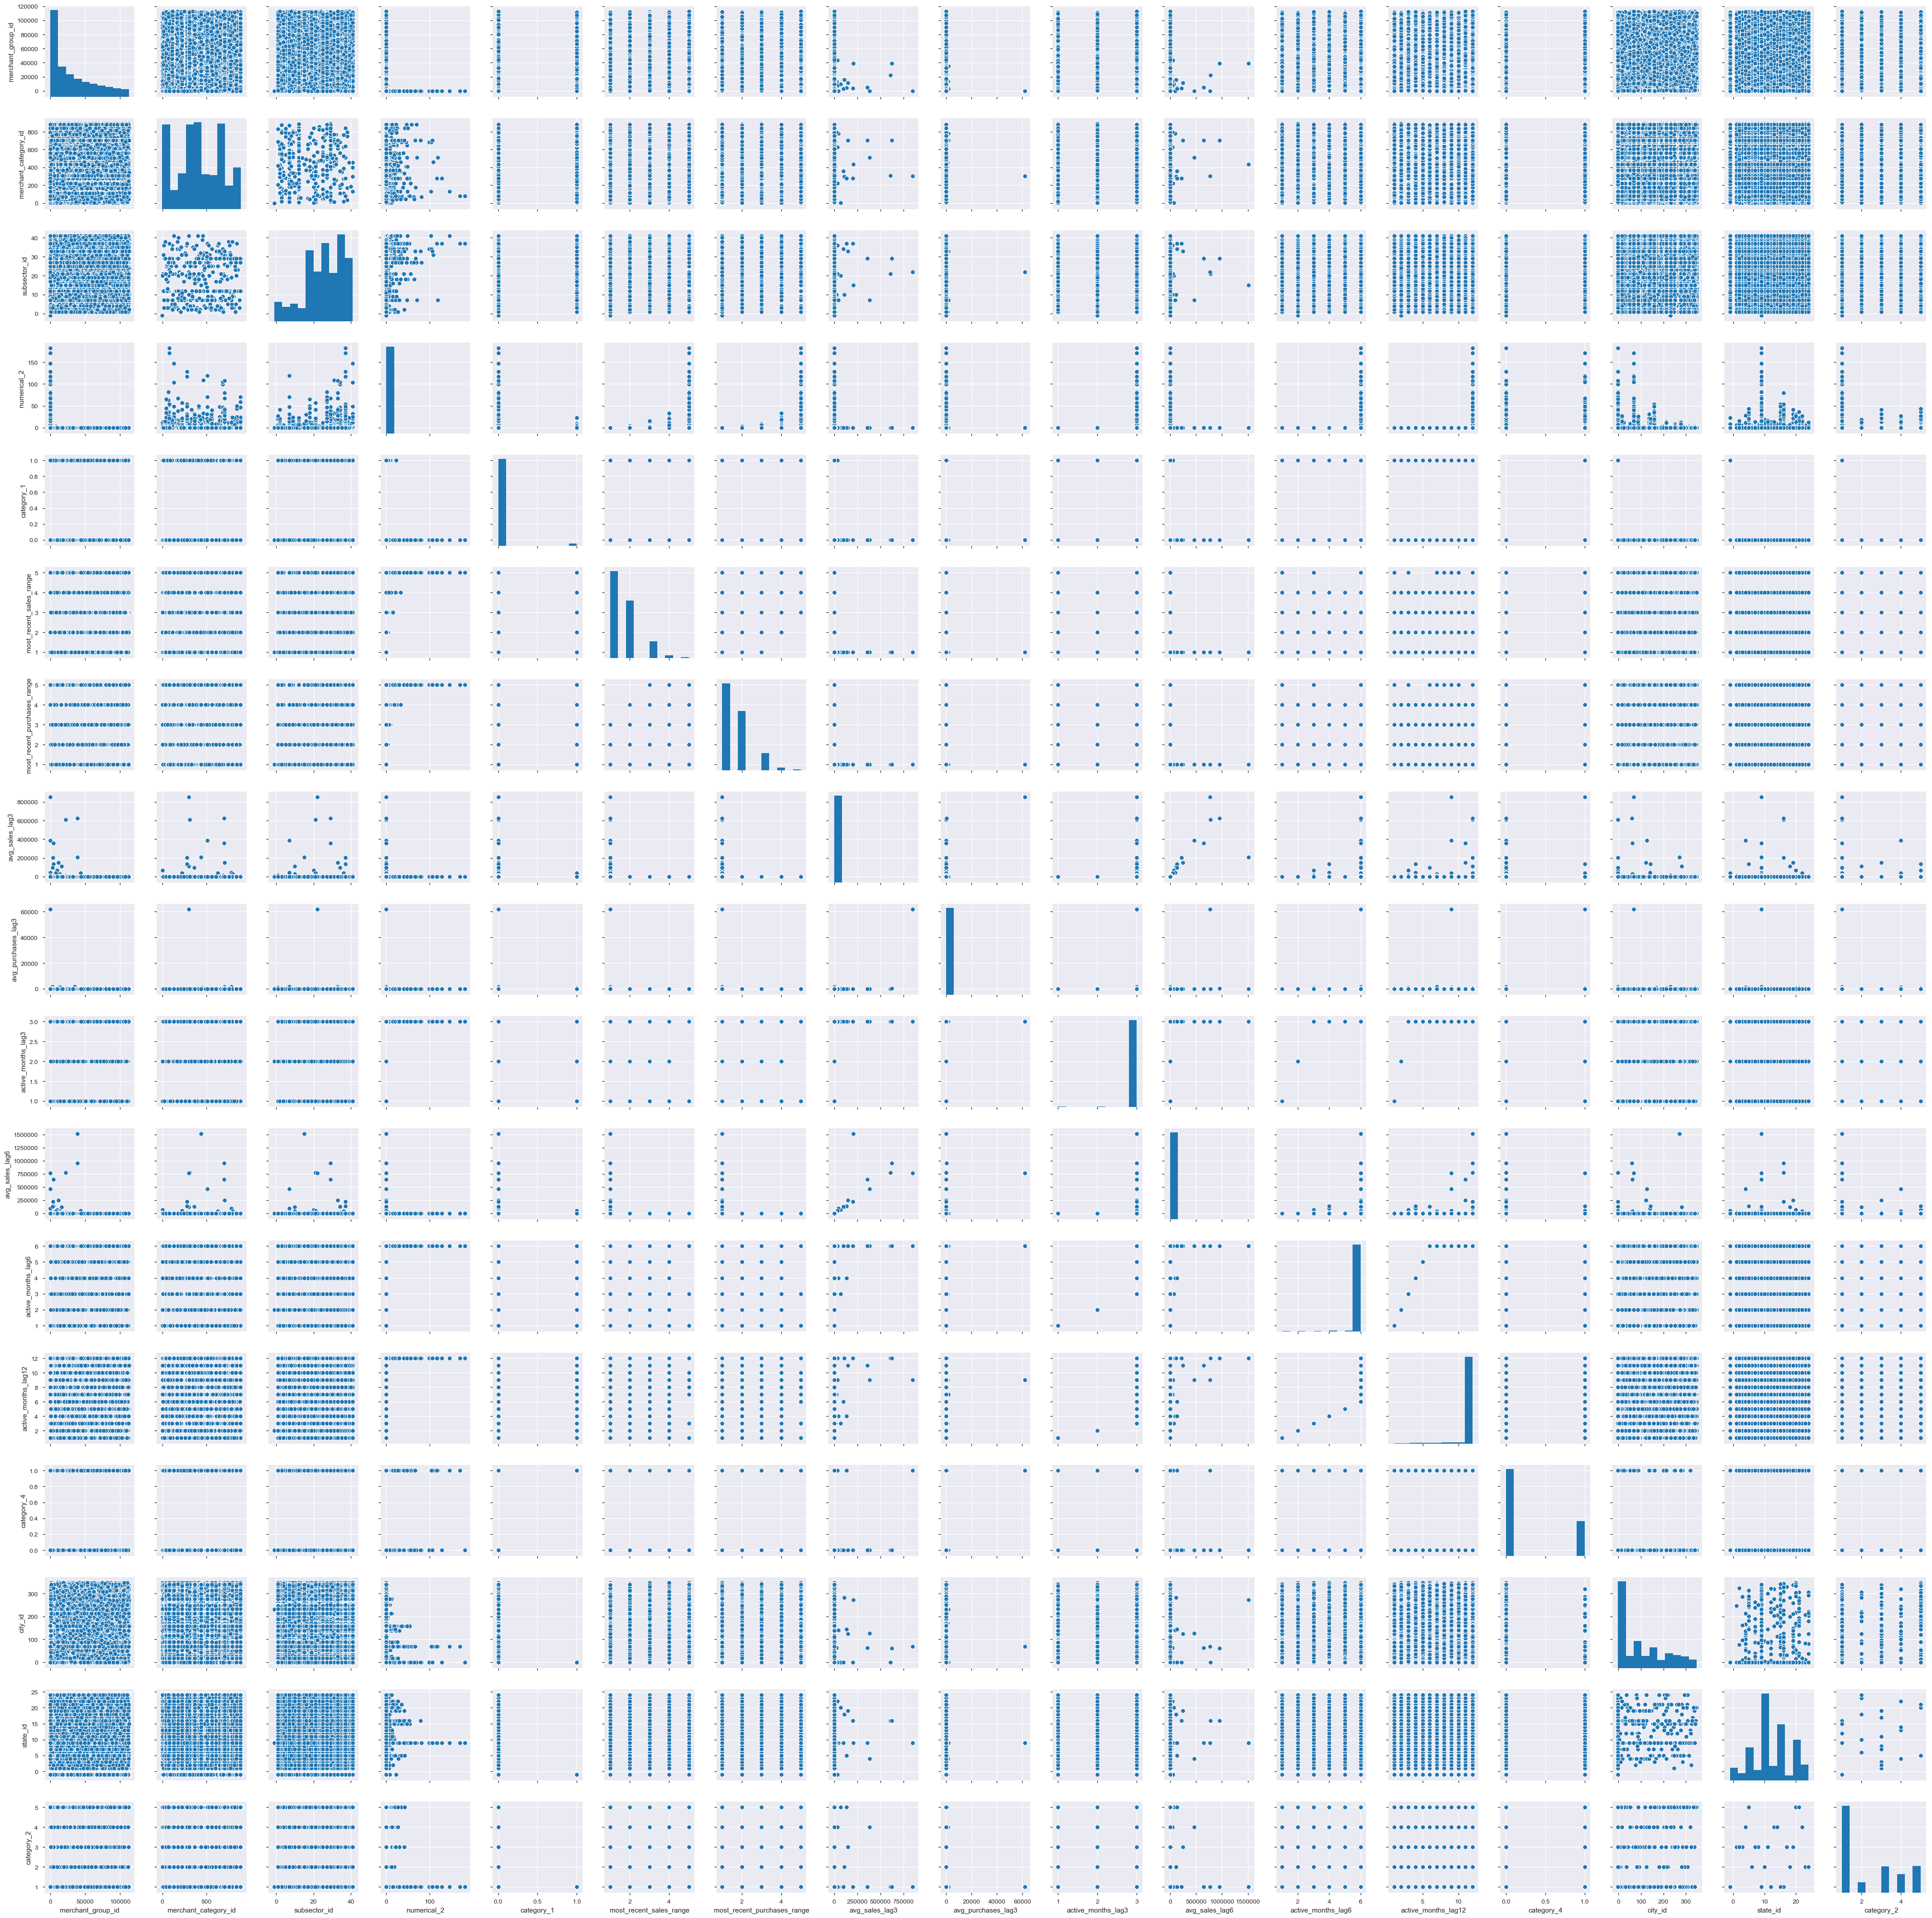

In [31]:
sns.pairplot(merchants)

In [32]:
#This block considers all variables and can be used iteratively to minimize re-running code
#We can limit the variables of interest if we want to
def Plot(varname,dataset):   
    f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,4))
    
    ax1.set_title('Before Log for var:' + varname)
    ax2.set_title('After Log for var:' + varname)
    ax3.set_title('After Sqrt for var:' + varname) 
    
    sns.distplot(dataset[varname].fillna(0),ax=ax1,fit=norm)   
    sns.distplot((np.log(dataset[varname]).fillna(0)),ax=ax2,fit=norm)
    sns.distplot((np.sqrt(dataset[varname]).fillna(0)),ax=ax3,fit=norm)    
    #f.savefig(varname+".png")
    plt.show()
   

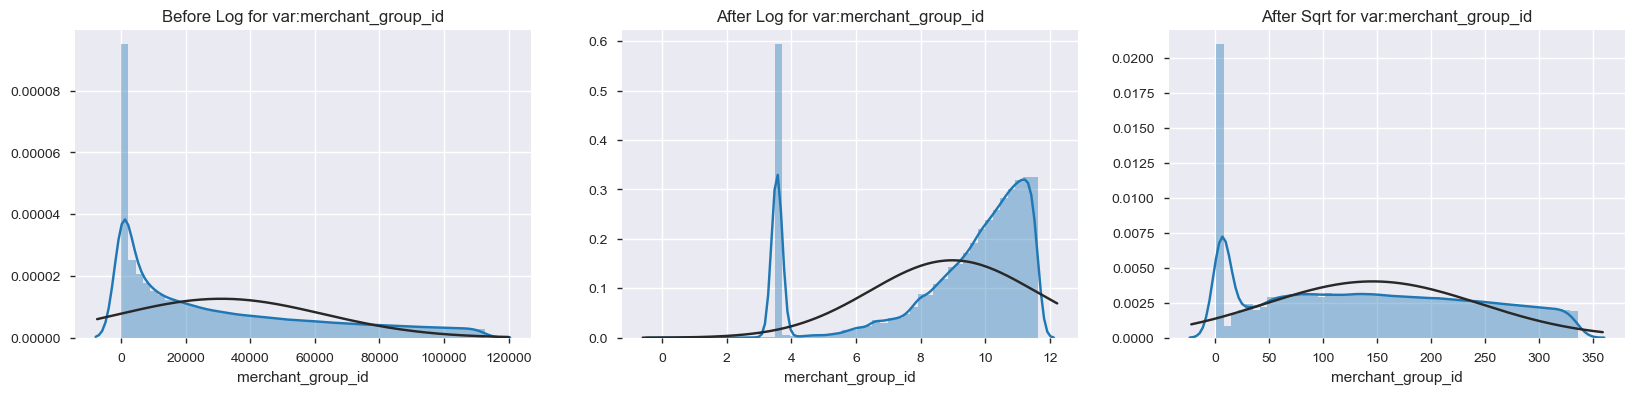

In [33]:
Plot('merchant_group_id',merchants)

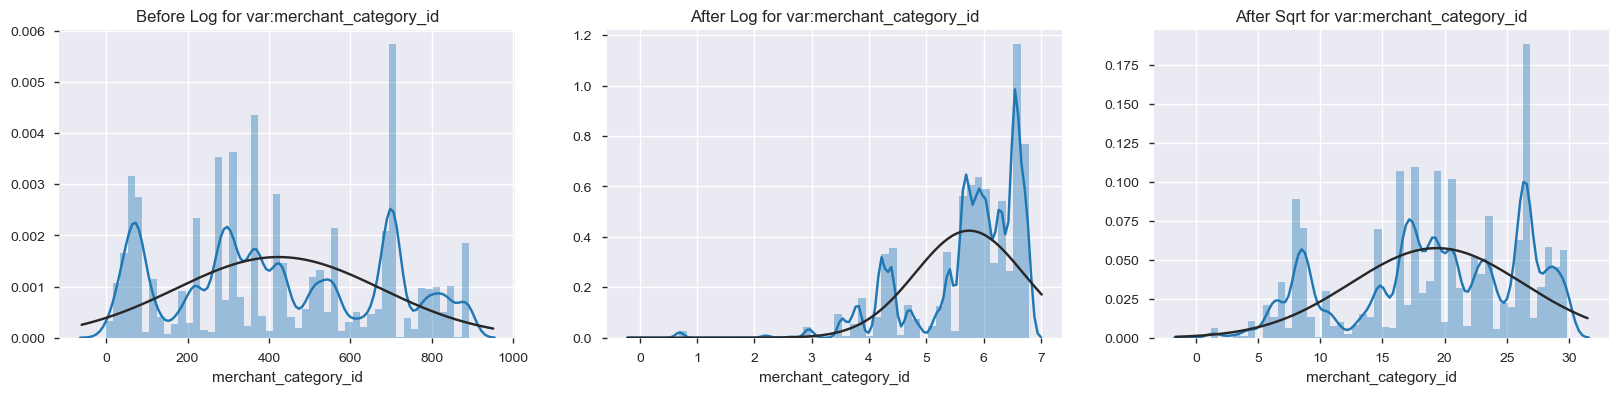

In [34]:
Plot('merchant_category_id',merchants)

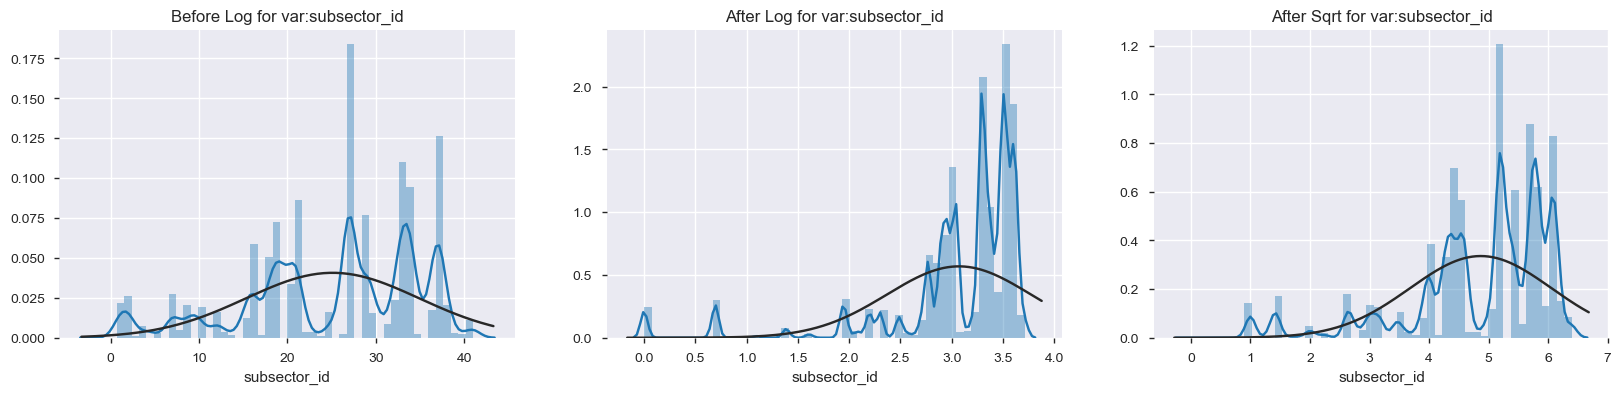

In [35]:
Plot('subsector_id',merchants)

In [20]:
merchantcnts = merchants.sort_values('merchant_id').groupby('merchant_id').size().reset_index()

In [24]:
merchants[merchants['merchant_id'].isin(merchantcnts[merchantcnts[0]>1]['merchant_id'].values)].sort_values('merchant_id',ascending=False).head(10)

merchant_id  merchant_group_id  merchant_category_id  \
83151   M_ID_fea38c640b                 35                   884   
83152   M_ID_fea38c640b                 35                   884   
4181    M_ID_ef233cff26                 35                   560   
4182    M_ID_ef233cff26              28799                   560   
4183    M_ID_ef233cff26              28799                   560   
4184    M_ID_ef233cff26                 35                   560   
166812  M_ID_ebbdb42da6               1014                   383   
166813  M_ID_ebbdb42da6                 35                   383   
166814  M_ID_ebbdb42da6               1014                   383   
166815  M_ID_ebbdb42da6                 35                   383   

        subsector_id  numerical_2 category_1 most_recent_sales_range  \
83151             27    -0.057471          N                       E   
83152             27     0.616743          N                       C   
4181              34    -0.057471          N                       E   
4182              34    -0.057471          N                       E   
4183              34    -0.057471          N                       D   
4184              34    -0.057471          N                       D   
166812             2    -0.007896          Y                       E   
166813             2    -0.007896          Y                       E   
166814             2    -0.057471          Y                       A   
166815             2    -0.057471          Y                       A   

       most_recent_purchases_range  avg_sales_lag3  avg_purchases_lag3  \
83151                            E        0.470000            0.666667   
83152                            C        0.840000            0.841643   
4181                             E      322.440000           76.555556   
4182                             E      322.440000           76.555556   
4183                             D        4.740000            4.077922   
4184                             D        4.740000            4.077922   
166812                           E        0.900000            1.196078   
166813                           E        0.900000            1.196078   
166814                           A        0.950000            0.967848   
166815                           A        0.950000            0.967848   

        active_months_lag3  avg_sales_lag6  active_months_lag6  \
83151                    3        0.470000                   3   
83152                    3        0.840000                   6   
4181                     3      817.530000                   6   
4182                     3      817.530000                   6   
4183                     3        4.980000                   6   
4184                     3        4.980000                   6   
166812                   3        1.410000                   6   
166813                   3        1.410000                   6   
166814                   3        0.860000                   6   
166815                   3        0.860000                   6   

        active_months_lag12 category_4  city_id  state_id  category_2  
83151                     3          N      156         7    3.000000  
83152                    12          N      156         7    3.000000  
4181                      9          Y       69         9    1.000000  
4182                      9          Y       69         9    1.000000  
4183                      8          Y       69         9    1.000000  
4184                      8          Y       69         9    1.000000  
166812                   12          Y       -1        -1    1.000000  
166813                   12          Y       -1        -1    1.000000  
166814                   12          Y       -1        -1    1.000000  
166815                   12          Y       -1        -1    1.000000

In [34]:
merchants[merchants['merchant_id'].isin(['M_ID_ebbdb42da6'])]

merchant_id  merchant_group_id  merchant_category_id  \
166812  M_ID_ebbdb42da6               1014                   383   
166813  M_ID_ebbdb42da6                 35                   383   
166814  M_ID_ebbdb42da6               1014                   383   
166815  M_ID_ebbdb42da6                 35                   383   

        subsector_id  numerical_1  numerical_2 category_1  \
166812             2     0.011934    -0.007896          Y   
166813             2     0.011934    -0.007896          Y   
166814             2    -0.057471    -0.057471          Y   
166815             2    -0.057471    -0.057471          Y   

       most_recent_sales_range most_recent_purchases_range  avg_sales_lag3  \
166812                       E                           E        0.900000   
166813                       E                           E        0.900000   
166814                       A                           A        0.950000   
166815                       A                           A        0.950000   

        avg_purchases_lag3  active_months_lag3  avg_sales_lag6  \
166812            1.196078                   3        1.410000   
166813            1.196078                   3        1.410000   
166814            0.967848                   3        0.860000   
166815            0.967848                   3        0.860000   

        avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
166812            1.921569                   6         1.380000   
166813            1.921569                   6         1.380000   
166814            0.896628                   6         0.760000   
166815            0.896628                   6         0.760000   

        avg_purchases_lag12  active_months_lag12 category_4  city_id  \
166812             1.801471                   12          Y       -1   
166813             1.801471                   12          Y       -1   
166814             0.798322                   12          Y       -1   
166815             0.798322                   12          Y       -1   

        state_id  category_2  
166812        -1         nan  
166813        -1         nan  
166814        -1         nan  
166815        -1         nan

In [ ]:
#from above example we still need to come down to two rows for this merchant , - need to discuss, once that is done , 
#our joins with hist file should be on merchant_id , merchant_group_id , merchant_catergory_id

In [21]:
final_deduped= merchants.drop_duplicates(['merchant_id','merchant_category_id','subsector_id'])


In [22]:
final_deduped[final_deduped['merchant_id'].isin(['M_ID_ebbdb42da6'])]

merchant_id  merchant_group_id  merchant_category_id  \
166812  M_ID_ebbdb42da6               1014                   383   

        subsector_id  numerical_2  category_1  most_recent_sales_range  \
166812             2    -0.007896           1                        1   

        most_recent_purchases_range  avg_sales_lag3  avg_purchases_lag3  \
166812                            1        0.900000            1.196078   

        active_months_lag3  avg_sales_lag6  active_months_lag6  \
166812                   3        1.410000                   6   

        avg_purchases_lag12  active_months_lag12  category_4  city_id  \
166812             1.801471                   12           1       -1   

        state_id  category_2  
166812        -1    1.000000

In [23]:
final_deduped.to_csv('/Users/rajmati.marlecha/Documents/elo-merchant-category-recommendation/merchants_transformed.csv', index = False, header = True)

In [57]:
final_deduped.shape


(334634, 18)

In [58]:
final_deduped.nunique()

merchant_id                    334633
merchant_group_id              109389
merchant_category_id              324
subsector_id                       41
numerical_2                       941
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
avg_sales_lag3                   3372
avg_purchases_lag3              99973
active_months_lag3                  3
avg_sales_lag6                   4507
active_months_lag6                  6
active_months_lag12                12
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64